1- Detect and crop license plates in car images.

https://www.kaggle.com/datasets/andrewmvd/car-plate-detection?select=annotations


2- detect and crop characters from license plates images.

3- classify characters and print text output.

In [23]:
# Imports

# !pip install tensorflow==2.4.0
# !pip install tensorflow-gpu==2.4.0
# !pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0
# !pip install imageai --upgrade
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import os
import PIL.Image
from PIL import ImageOps
import PIL
import pathlib
import matplotlib.pyplot as plt
import datetime
import tensorboard
import IPython
import sklearn
import cv2
import subprocess
import sys
# from imageai.Classification import ImageClassification
# from imageai.Detection.Custom import DetectionModelTrainer
# from imageai.Detection.Custom import CustomObjectDetection
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#Trainer

# trainer = DetectionModelTrainer()
# trainer.setModelTypeAsYOLOv3()
# trainer.setDataDirectory(data_directory="/content/drive/MyDrive/imageai/LPDS")
# trainer.setTrainConfig(object_names_array=["licence"], batch_size=8, num_experiments=30, train_from_pretrained_model="/content/drive/MyDrive/imageai/LPDS/models/detection_model-ex-018--loss-0014.416.h5")
# trainer.trainModel()

In [25]:
#Evaluate

# trainer = DetectionModelTrainer()
# trainer.setModelTypeAsYOLOv3()
# trainer.setDataDirectory(data_directory="/content/drive/MyDrive/imageai/LPDS")
# metrics = trainer.evaluateModel(model_path="/content/drive/MyDrive/imageai/LPDS/models", json_path="/content/drive/MyDrive/imageai/LPDS/json/detection_config.json", iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)
# print(metrics)

In [26]:
#Detector

# detector = CustomObjectDetection()
# detector.setModelTypeAsYOLOv3()
# detector.setModelPath("/content/drive/MyDrive/imageai/LPDS/models/detection_model-ex-029--loss-0014.191.h5")
# detector.setJsonPath("/content/drive/MyDrive/imageai/LPDS/json/detection_config.json")
# detector.loadModel()
# detections = detector.detectObjectsFromImage(input_image="/content/drive/MyDrive/imageai/LPDS/train/images/Cars100.png", output_image_path="/content/drive/MyDrive/imageai/LP-detected.jpg",  extract_detected_objects=True)
# #for detection in detections:
#  #   print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

In [27]:
# prediction = ImageClassification()

# base_model = tf.keras.applications.inception_v3.InceptionV3(
#     input_shape = (299, 299, 3),
#     include_top = True, 
#     weights = "imagenet"                  
# )

# saving_path = pathlib.Path('/content/drive/MyDrive/imageai/SavedBaseModel.h5')

# base_model.save(saving_path)

# model_path = pathlib.Path('/content/drive/MyDrive/imageai/SavedBaseModel.h5')

# prediction.setModelTypeAsInceptionV3()

# prediction.setModelPath("/content/drive/MyDrive/imageai/SavedBaseModel.h5")

# prediction.loadModel()

# predictions, probabilities = prediction.classifyImage("/content/drive/MyDrive/License_Plate_Recognition/LicPlateImages/10.png", result_count=10)

# for eachPrediction, eachProbability in zip(predictions, probabilities):
#     print(eachPrediction , " : " , eachProbability)


In [28]:
# batch_size = 64
# # Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# # Each input sequence will be of size (28, 28) (height is treated like time).
# input_dim = 28

# units = 64
# output_size = 5  # labels are from 0 to 9

# # Build the RNN model
# def build_model(allow_cudnn_kernel=True):
#     # CuDNN is only available at the layer level, and not at the cell level.
#     # This means `LSTM(units)` will use the CuDNN kernel,
#     # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
#     if allow_cudnn_kernel:
#         # The LSTM layer with default options uses CuDNN.
#         lstm_layer = keras.layers.LSTM(units, return_state=True, input_shape=(None, input_dim))
#         # lstm_layer = keras.layers.GRU(units, input_shape=(None, input_dim))
#     else:
#         # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
#         lstm_layer = keras.layers.RNN(
#             keras.layers.LSTMCell(units), input_shape=(None, input_dim)
#         )
#     model = keras.models.Sequential(
#         [
#            # keras.layers.Conv2D(16, 3, activation='ELU', kernel_regularizer=tf.keras.regularizers.l2(0.001)),    
#            # keras.layers.Rescaling(scale=1/255),
#             lstm_layer,
#             keras.layers.BatchNormalization(),
#             keras.layers.Dense(output_size),
#         ]
#     )
#     return model


In [29]:
batch_size = 64
input_dim = 28
units = 64
output_size = 5

data_path = pathlib.Path('/content/drive/MyDrive/RNNTest/dataset_characters_blackbackground')
sample_path = pathlib.Path('/content/drive/MyDrive/imageai/LPDS/LP-detected-objects')

dataset_path = tf.keras.utils.image_dataset_from_directory(        # Training dataset
    data_path,
    labels= 'inferred',
    validation_split=0.2,
    subset='training',
    seed= 1,
    batch_size=batch_size,
    image_size=(input_dim,input_dim),
    color_mode="grayscale",
    shuffle=True)


dataset_path_val = tf.keras.utils.image_dataset_from_directory(      #Validation dataset
    data_path,
    labels= 'inferred',
    validation_split=0.2,
    subset='validation',
    seed= 2,
    batch_size=batch_size,
    image_size=(input_dim, input_dim),
    color_mode="grayscale",
    shuffle=True)

sample = tf.keras.utils.image_dataset_from_directory(
    sample_path,
    labels= 'inferred',
    batch_size=1,
    image_size=(200,200),
    color_mode="grayscale"
)

Found 5377 files belonging to 5 classes.
Using 4302 files for training.
Found 5377 files belonging to 5 classes.
Using 1075 files for validation.
Found 1 files belonging to 2 classes.


In [30]:
AUTOTUNE=tf.data.AUTOTUNE
dataset_path = dataset_path.cache().prefetch(buffer_size=AUTOTUNE)
# dataset_path_val = dataset_path_val.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:


lstm_layer = tf.keras.layers.LSTM(units, input_shape=(None, input_dim), dropout=0.2)

inputs = tf.keras.Input(shape=(None, input_dim))

x = lstm_layer(inputs)
#existing_state = lstm_layer.states
#n = tf.keras.layers.LSTM(units, input_shape=(None, input_dim), dropout=0.2, return_sequences=True)
y = tf.keras.layers.BatchNormalization()(x)
z = tf.keras.layers.Dense(output_size)(y)

model = tf.keras.Model(inputs, z)

In [32]:
# # model_lstm = tf.keras.Sequential()
# # model_lstm.add(tf.keras.layers.LSTM(units=125, activation="tanh", return_sequences=True))
# # model_lstm.add(tf.keras.layers.Dense(units=1))
# model = keras.Sequential()
# model.add(layers.Embedding(input_dim=1000, output_dim=64))

# # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
# model.add(layers.GRU(256, return_sequences=True))

# # The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
# model.add(layers.SimpleRNN(128))

# model.add(layers.Dense(10))

# model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)


model.fit(
    dataset_path, validation_data=dataset_path_val, batch_size=batch_size, epochs=20
)

model.summary()

saving_path = pathlib.Path('/content/drive/MyDrive/RNNTest/RNNSavedModels/')

tf.keras.models.save_model(model,                                     
                           saving_path,
                           overwrite=True,
                           save_format='tf'
                           )

# model_lstm.fit(dataset_path, epochs=50, batch_size=32)

Epoch 1/20
68/68 [==============================] - 8s 75ms/step - loss: 1.3785 - accuracy: 0.4526 - val_loss: 1.2833 - val_accuracy: 0.5777
Epoch 2/20
68/68 [==============================] - 1s 20ms/step - loss: 1.0747 - accuracy: 0.5709 - val_loss: 1.0464 - val_accuracy: 0.6930
Epoch 3/20
68/68 [==============================] - 1s 20ms/step - loss: 0.9023 - accuracy: 0.6534 - val_loss: 0.8621 - val_accuracy: 0.7135
Epoch 4/20
68/68 [==============================] - 1s 20ms/step - loss: 0.7968 - accuracy: 0.7080 - val_loss: 0.6866 - val_accuracy: 0.7786
Epoch 5/20
68/68 [==============================] - 1s 20ms/step - loss: 0.7111 - accuracy: 0.7490 - val_loss: 0.5734 - val_accuracy: 0.8074
Epoch 6/20
68/68 [==============================] - 1s 20ms/step - loss: 0.6591 - accuracy: 0.7620 - val_loss: 0.5092 - val_accuracy: 0.8316
Epoch 7/20
68/68 [==============================] - 1s 20ms/step - loss: 0.6212 - accuracy: 0.7757 - val_loss: 0.4808 - val_accuracy: 0.8288
Epoch 8/20
68

Found 1 files belonging to 2 classes.
0


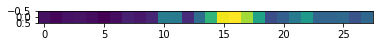

0


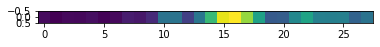

0


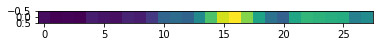

0


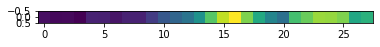

0


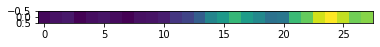

0


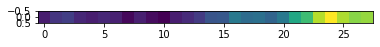

0


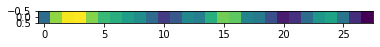

0


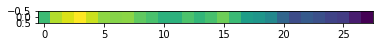

0


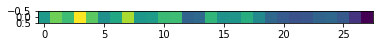

0


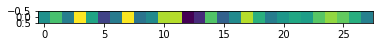

0


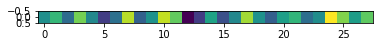

0


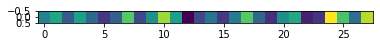

0


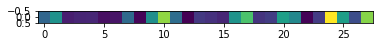

0


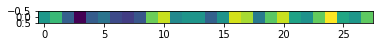

0


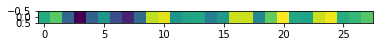

0


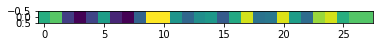

0


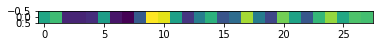

0


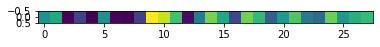

0


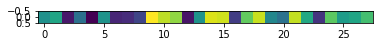

0


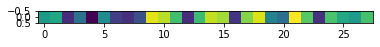

0


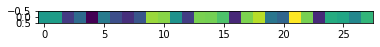

0


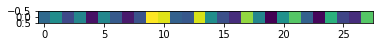

0


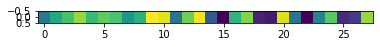

0


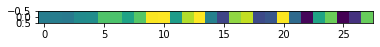

0


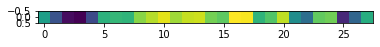

0


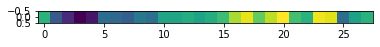

0


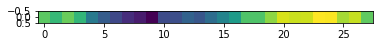

0


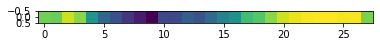

In [57]:
samp_path = pathlib.Path('/content/drive/MyDrive/imageai/LPDS/LP-detected-objects')

sampl_path = tf.keras.utils.image_dataset_from_directory(      
    samp_path,
    labels= 'inferred',
    seed= 1,
    batch_size=1,
    image_size=(28, 28),
    color_mode="grayscale",
    shuffle=False)

loading_path = pathlib.Path('/content/drive/MyDrive/RNNTest/RNNSavedModels/')
loaded_model = tf.keras.models.load_model(loading_path, compile=True)   

loaded_model.compile(                                                   
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

sample_list = []                                                      
for sample,label in sampl_path.take(1):
    sample_list.append(sample)
    continue

sample_list = np.array(sample_list)                                    
shsample_list = sample_list.reshape(28, 1, 28)
for sample in shsample_list:                                             
    predictions = loaded_model.predict(tf.expand_dims(sample, 0))
    pred = np.argmax(predictions, axis=0)
    print(pred[0])
    plt.imshow(sample)
    plt.show()

In [ ]:
# with tf.device("CPU:0"):
#     cpu_model = build_model(allow_cudnn_kernel=True)
#     cpu_model.set_weights(model.get_weights())
#     sample =  np.array(sample)
#     result = tf.argmax(cpu_model.predict(tf.expand_dims(sample, 0)), axis=1)
#     print(
#         "Predicted result is: %s, target result is:" % (result.numpy())
#     )
#     plt.imshow(sample, cmap=plt.get_cmap("gray"))